# AI PRODUCT & PRICE MATCHING

**Contributors:** ***Peilin Han, Carmen Pop, Kalinga Swain, Natasha Uwase***

 This project focuses on resolving issues related to SKU analysis and product matching. We're working with datasets from MECP and three other competitors: C6, LifeSupply, and MedicalWarehouse. Each dataset contains product name/Title, SKUs, product descriptions, prices, permalink, created_at represented in string and float formats.

# Data Preparation

We'll start by first preparing our data by bringing it from source and splitting it into training, validation and test data splits.
We'll load the data from a CSV file to a Pandas DataFrame using the read_csv function.

In [48]:
import pandas as pd

In [49]:
# Data preparation & ingestion: MECP

def data_read(a):
  df = pd.read_csv(a)
  return df

df = data_read("./mecp_products.csv")
df.head()

,id,name,description,sku,price,permalink,created_at
0,1,Cordless Bed and Chair Sensor Pads,The Cordless Bed and Chair Sensor Pads provide...,NaN,0.00,https://mecp.ca/?post_type=product&p=60037,2024-03-13 22:29:39
1,2,MedPro Rayon Balls,"MedPro Non-sterile rayon balls 50% rayon, 50% ...",NaN,35.53,https://mecp.ca/product/medpro-rayon-balls/,2024-03-13 22:29:39
2,3,MedPro Rayon Balls,"MedPro Non-sterile rayon balls 50% rayon, 50% ...",NaN,0.00,https://mecp.ca/?post_type=product&p=60020,2024-03-13 22:29:39
3,4,Clorox Bleach Germicidal Wipes Bucket,Clorox Healthcare Bleach Germicidal Wipes: Rea...,55894,129.50,https://mecp.ca/product/clorox-bleach-germicid...,2024-03-13 22:29:39
4,5,Clorox Healthcare Bleach Germicidal Wipes Ter...,NaN,NaN,0.00,https://mecp.ca/?post_type=product&p=59985,2024-03-13 22:29:39


In [50]:
# Data preparation & ingestion: C6
c6_data = data_read("./c6_products.csv")
c6_data.head()

,id,name,description,sku,price,permalink,created_at
0,1,Cotton Balls | Economy | 0.22g | Bag of 2000,KOSMA-KARE Cotton balls are ideal for applying...,KK-21176,9.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11
1,2,"Lactated Ringer Subcutaneous Fluids, USP",B. Braun Lactated Ringer's Injection USP is st...,BB-L7501,7.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11
2,3,"Grafco® Unlabeled Flint Glass Sundry Jar | 7"" ...",graham field Grafco® Unlabeled Flint Glass Sun...,GF-3458,12.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11
3,4,Cotton Balls | High Density | Bag of 1000,KOSMA-KARE Cotton balls are ideal for applying...,KK-21476,15.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11
4,5,"Aerosol Kit with Mask, Nebulizer, & Tubing | 7...",Glenwood Laboratories Canada Ltd Pediatric Aer...,GK-1807,9.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11


In [51]:
# Data preparation & ingestion: LifeSupply
lifesupply_data = data_read("./lifesupply_products.csv")
lifesupply_data.head()

,id,name,description,sku,price,permalink,created_at
0,1,Drive 16012-HOEO Overbed Table Economy-EO-H Ba...,Drive Drive 16012-HOEO 822383238463,Drive 16012-HOEO,220.63,https://lifesupply.ca/drive-16012-hoeo-overbed...,2024-03-18 16:29:10
1,2,Drive 16012-HODMV Overbed Table Economy-DM-H B...,Drive Drive 16012-HODMV Overbed Table Economy-...,Drive 16012-HODMV,291.24,https://lifesupply.ca/drive-16012-hodmv-overbe...,2024-03-18 16:29:10
2,3,Drive 16012-UOSOV Overbed Table Economy-SO-U-O...,Drive Drive 16012-UOSOV Overbed Table Economy-...,Drive 16012-UOSOV,291.24,https://lifesupply.ca/drive-16012-uosov-overbe...,2024-03-18 16:29:10
3,4,BIOTIME - TERRAN BROWN FABRIC Size 11,BIOTIME 3TERRANBRNFA11 BIOTIME - TERRAN BROWN ...,3TERRANBRNFA11,79.00,https://lifesupply.ca/biotime-terran-brown-fab...,2024-03-18 16:29:10
4,5,BIOTIME - TERRAN BROWN FABRIC Size 10,BIOTIME 3TERRANBRNFA10 BIOTIME - TERRAN BROWN ...,3TERRANBRNFA10,79.00,https://lifesupply.ca/biotime-terran-brown-fab...,2024-03-18 16:29:10


In [52]:
# Data preparation & ingestion: MedicalWarehouse
medwarehouse_data = data_read("./med_warehouse_products.csv")
medwarehouse_data.head()

,id,name,description,sku,price,permalink,created_at
0,1,"Ea/1 Cane Aluminum Black W/ Fritz Handle 35""L ...",Airway,AIR 5143BK,36.98,https://medicalwarehouse.ca/products/air-5143bk,2024-03-18 16:29:11
1,2,"Ea/1 Cast Cover Half Arm, Adult",Airway,AIR 0158-A,31.23,https://medicalwarehouse.ca/products/air-0158-a,2024-03-18 16:29:11
2,3,"1/Pr Guardian Forearm Crutches, Adult",Medline,MDL G05161,94.94,https://medicalwarehouse.ca/products/mdl-g05161,2024-03-18 16:29:11
3,4,"Ea/1 Bios Wheelchair Cushion 16""X18""X3""",BIOS MEDICAL,BIOS LF882,46.16,https://medicalwarehouse.ca/products/bios-lf882,2024-03-18 16:29:11
4,5,Ea/1 Cane Wrist Strap,Airway,AIR 5131,5.26,https://medicalwarehouse.ca/products/air-5131,2024-03-18 16:29:11


**Data Visualization:**

Data visualization can help by providing intuitive and visual representations of complex datasets, making it easier to identify trends, patterns, and relationships within the data.


In [53]:
from sklearn.model_selection import train_test_split
df.description.value_counts()

description
Sterile.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                33
Material: Stainless Steel.                                                                                                                                                                                                                                                                                                                                                                       

In [54]:
unique_values_count = df['name'].nunique()
unique_values_count

3883

# Data Exploration

Data exploration can help us understand the distribution and characteristics of each attribute, enabling us to identify patterns, correlations, and anomalies. Additionally, it allows us to gain insights into potential areas for optimization or improvement in product matching and SKU analysis.

In [55]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

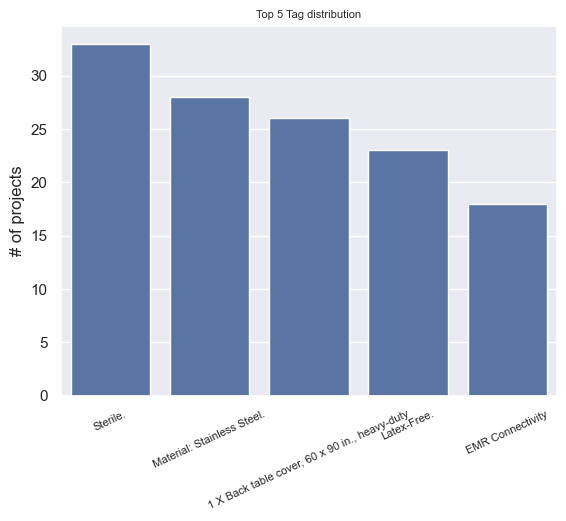

In [56]:
# Most common tags
all_tags = Counter(df.description)
# Get the top 5 most common tags
top_tags = dict(all_tags.most_common(5))

# Plot tag frequencies
tags, tag_counts = zip(*top_tags.items())
plt.figure()
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=25, fontsize=8)
plt.title("Top 5 Tag distribution", fontsize=8)
plt.ylabel("# of projects", fontsize=12)
plt.show()

# Data Preprocessing

For our application, we'll be implementing a few of these preprocessing steps that are relevant for our dataset. We can combine existing input features to create new meaningful signal for helping the model learn. But again this is for experimentation to know the data better.

In [57]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [58]:
df['description'] = df['description'].fillna('')
df["combine_name_desc"] = df.name + " " + df.description
df.head()

,id,name,description,sku,price,permalink,created_at,combine_name_desc
0,1,Cordless Bed and Chair Sensor Pads,The Cordless Bed and Chair Sensor Pads provide...,NaN,0.00,https://mecp.ca/?post_type=product&p=60037,2024-03-13 22:29:39,Cordless Bed and Chair Sensor Pads The Cordles...
1,2,MedPro Rayon Balls,"MedPro Non-sterile rayon balls 50% rayon, 50% ...",NaN,35.53,https://mecp.ca/product/medpro-rayon-balls/,2024-03-13 22:29:39,MedPro Rayon Balls MedPro Non-sterile rayon ba...
2,3,MedPro Rayon Balls,"MedPro Non-sterile rayon balls 50% rayon, 50% ...",NaN,0.00,https://mecp.ca/?post_type=product&p=60020,2024-03-13 22:29:39,MedPro Rayon Balls MedPro Non-sterile rayon ba...
3,4,Clorox Bleach Germicidal Wipes Bucket,Clorox Healthcare Bleach Germicidal Wipes: Rea...,55894,129.50,https://mecp.ca/product/clorox-bleach-germicid...,2024-03-13 22:29:39,Clorox Bleach Germicidal Wipes Bucket Clorox H...
4,5,Clorox Healthcare Bleach Germicidal Wipes Ter...,,NaN,0.00,https://mecp.ca/?post_type=product&p=59985,2024-03-13 22:29:39,Clorox Healthcare Bleach Germicidal Wipes Ter...


In [59]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carmen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We can clean the text as per the industry standards, no matter what we use in this project like conventional Machine Learning or Deep Learning for future ventures, this cleaning could help!

In [60]:
def dataCleaning(text, stopwords=STOPWORDS):
    #Clean raw text string
    if isinstance(text, str):
      text = text.lower() # lowering text
      # Removing stopwords
      pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
      text = pattern.sub('', text)

      # Spacing and filters
      text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
      text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric characters
      text = re.sub(" +", " ", text)  # remove multiple spaces
      text = text.strip()  # strip white space at the ends
      text = re.sub(r"http\S+", "", text)  #  remove links

    return text

In [61]:
# Apply to dataframe
original_df = df.copy()
df.combine_name_desc = df.combine_name_desc.apply(dataCleaning)
print("Example:\n")
print (f"Original Data:\n{original_df.combine_name_desc.values[0]}\n\nFiltered Data:\n{df.combine_name_desc.values[0]}")
df.head()

Example:

Original Data:
Cordless Bed and Chair Sensor Pads The Cordless Bed and Chair Sensor Pads provide reliable monitoring with a lifespan of 18 months. The cordless option eliminates cord tripping hazards and damage, reducing false alarms. The pads can be folded for easy storage.

Filtered Data:
cordless bed chair sensor pads cordless bed chair sensor pads provide reliable monitoring lifespan 18 months cordless option eliminates cord tripping hazards damage reducing false alarms pads folded easy storage


,id,name,description,sku,price,permalink,created_at,combine_name_desc
0,1,Cordless Bed and Chair Sensor Pads,The Cordless Bed and Chair Sensor Pads provide...,NaN,0.00,https://mecp.ca/?post_type=product&p=60037,2024-03-13 22:29:39,cordless bed chair sensor pads cordless bed ch...
1,2,MedPro Rayon Balls,"MedPro Non-sterile rayon balls 50% rayon, 50% ...",NaN,35.53,https://mecp.ca/product/medpro-rayon-balls/,2024-03-13 22:29:39,medpro rayon balls medpro non sterile rayon ba...
2,3,MedPro Rayon Balls,"MedPro Non-sterile rayon balls 50% rayon, 50% ...",NaN,0.00,https://mecp.ca/?post_type=product&p=60020,2024-03-13 22:29:39,medpro rayon balls medpro non sterile rayon ba...
3,4,Clorox Bleach Germicidal Wipes Bucket,Clorox Healthcare Bleach Germicidal Wipes: Rea...,55894,129.50,https://mecp.ca/product/clorox-bleach-germicid...,2024-03-13 22:29:39,clorox bleach germicidal wipes bucket clorox h...
4,5,Clorox Healthcare Bleach Germicidal Wipes Ter...,,NaN,0.00,https://mecp.ca/?post_type=product&p=59985,2024-03-13 22:29:39,clorox healthcare bleach germicidal wipes term...


**We have not experimented or decided yet if removing sole numerical (int/float) values from the combine_name_desc will benefit our Model, we have to experiment.**

We can  clean data further by dropping unwanted columns

In [62]:
# Column drop
df = df.drop(columns=["permalink", "name", "created_at"], errors="ignore")
df = df[["combine_name_desc", "sku", "price"]]
df.head()

,combine_name_desc,sku,price
0,cordless bed chair sensor pads cordless bed ch...,NaN,0.00
1,medpro rayon balls medpro non sterile rayon ba...,NaN,35.53
2,medpro rayon balls medpro non sterile rayon ba...,NaN,0.00
3,clorox bleach germicidal wipes bucket clorox h...,55894,129.50
4,clorox healthcare bleach germicidal wipes term...,NaN,0.00


In [63]:
import numpy as np

# Assuming df is your DataFrame

# Generate unique random numbers to replace NaN values in 'sku' column
random_numbers = np.random.randint(100000, 999999, size=len(df))
df['sku'] = df['sku'].fillna(pd.Series(random_numbers, index=df.index))
df

,combine_name_desc,sku,price
0,cordless bed chair sensor pads cordless bed ch...,742138,0.00
1,medpro rayon balls medpro non sterile rayon ba...,915688,35.53
2,medpro rayon balls medpro non sterile rayon ba...,774422,0.00
3,clorox bleach germicidal wipes bucket clorox h...,55894,129.50
4,clorox healthcare bleach germicidal wipes term...,368890,0.00
...,...,...,...
3934,mouth shield clear mouth shield ideal people w...,mg-c,14.99
3935,face shield kids face shield designed kids com...,309035,8.99
3936,face shield adult face shield comfortable elas...,189219,7.99
3937,youth cotton face masks signature mask made me...,342524,8.99


In [64]:
df_experiment = df.copy()
df_experiment = df_experiment.drop_duplicates(subset=["combine_name_desc"])
df_experiment = df_experiment.drop_duplicates(subset=["sku"])
df_experiment

,combine_name_desc,sku,price
0,cordless bed chair sensor pads cordless bed ch...,742138,0.00
1,medpro rayon balls medpro non sterile rayon ba...,915688,35.53
3,clorox bleach germicidal wipes bucket clorox h...,55894,129.50
4,clorox healthcare bleach germicidal wipes term...,368890,0.00
5,lysol go 15 ct disinfectant wipes lysol go cit...,CB998311,68.40
...,...,...,...
3934,mouth shield clear mouth shield ideal people w...,mg-c,14.99
3935,face shield kids face shield designed kids com...,309035,8.99
3936,face shield adult face shield comfortable elas...,189219,7.99
3937,youth cotton face masks signature mask made me...,342524,8.99


# Similarly we will filter the data of the Competitors Dataset.

In [77]:
# Apply to dataframe
c6_data['description'] = c6_data['description'].fillna('')
c6_data["combine_name_desc"] = c6_data.name + " " + c6_data.description
c6_data_original_df = c6_data.copy()

c6_data.head()



,id,name,description,sku,price,permalink,created_at,combine_name_desc
0,1,Cotton Balls | Economy | 0.22g | Bag of 2000,KOSMA-KARE Cotton balls are ideal for applying...,KK-21176,9.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,Cotton Balls | Economy | 0.22g | Bag of 2000 K...
1,2,"Lactated Ringer Subcutaneous Fluids, USP",B. Braun Lactated Ringer's Injection USP is st...,BB-L7501,7.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,"Lactated Ringer Subcutaneous Fluids, USP B. Br..."
2,3,"Grafco® Unlabeled Flint Glass Sundry Jar | 7"" ...",graham field Grafco® Unlabeled Flint Glass Sun...,GF-3458,12.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,"Grafco® Unlabeled Flint Glass Sundry Jar | 7"" ..."
3,4,Cotton Balls | High Density | Bag of 1000,KOSMA-KARE Cotton balls are ideal for applying...,KK-21476,15.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,Cotton Balls | High Density | Bag of 1000 KOSM...
4,5,"Aerosol Kit with Mask, Nebulizer, & Tubing | 7...",Glenwood Laboratories Canada Ltd Pediatric Aer...,GK-1807,9.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,"Aerosol Kit with Mask, Nebulizer, & Tubing | 7..."


In [66]:
c6_data.combine_name_desc = c6_data.combine_name_desc.apply(dataCleaning)

print("Example:")
print (f"Original Data:{c6_data_original_df.combine_name_desc.values[0]}\nFiltered Data:{c6_data.combine_name_desc.values[0]}")
c6_data.head()

Example:
Original Data:Cotton Balls | Economy | 0.22g | Bag of 2000 KOSMA-KARE Cotton balls are ideal for applying first aid creams and ointments. They are white, non-sterile, and are made from 100% natural cotton. Non-Sterile Medical Cotton Balls are appropriate for wound treatment, cleaning, prepping, applying creams and ointments. Perfect for skin prepping and wound cleansing Removing makeup and ideal for beauty Personal care and household uses .
Filtered Data:cotton balls economy 0 22g bag 2000 kosma kare cotton balls ideal applying first aid creams ointments white non sterile made 100 natural cotton non sterile medical cotton balls appropriate wound treatment cleaning prepping applying creams ointments perfect skin prepping wound cleansing removing makeup ideal beauty personal care household uses


,id,name,description,sku,price,permalink,created_at,combine_name_desc
0,1,Cotton Balls | Economy | 0.22g | Bag of 2000,KOSMA-KARE Cotton balls are ideal for applying...,KK-21176,9.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,cotton balls economy 0 22g bag 2000 kosma kare...
1,2,"Lactated Ringer Subcutaneous Fluids, USP",B. Braun Lactated Ringer's Injection USP is st...,BB-L7501,7.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,lactated ringer subcutaneous fluids usp b brau...
2,3,"Grafco® Unlabeled Flint Glass Sundry Jar | 7"" ...",graham field Grafco® Unlabeled Flint Glass Sun...,GF-3458,12.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,grafco unlabeled flint glass sundry jar 7 x 4 ...
3,4,Cotton Balls | High Density | Bag of 1000,KOSMA-KARE Cotton balls are ideal for applying...,KK-21476,15.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,cotton balls high density bag 1000 kosma kare ...
4,5,"Aerosol Kit with Mask, Nebulizer, & Tubing | 7...",Glenwood Laboratories Canada Ltd Pediatric Aer...,GK-1807,9.99,https://c6.ca/collections/patient-care/product...,2024-03-18 16:29:11,aerosol kit mask nebulizer tubing 7 disposable...


In [67]:
# # we are removing sku here as we don't care about the cpmpetitor's sku, we can just filter by id assigned
# c6_experiment = c6_data.copy()
# c6_experiment = c6_experiment.drop(columns=["permalink", "name", "created_at", "sku"], errors="ignore")
# c6_experiment = c6_experiment[["id", "combine_name_desc", "price"]]


In [68]:
len(c6_data)

355

In [69]:
!pip install rapidfuzz


In [70]:
from nltk.metrics import edit_distance
from rapidfuzz import fuzz

c6_data_lavenshtein = c6_data.sample(n=100, random_state=42)
df_experiment_lavenshtein = df_experiment.sample(n=150, random_state=42)

matched_ids = []
similarity_scores = []

# Index the descriptions in df2 for efficient search
df2_index = {desc: index for index, desc in enumerate(c6_data_lavenshtein['combine_name_desc'])}


for desc1 in df_experiment_lavenshtein['combine_name_desc']:
    # Find the most similar description in df2 and its index
    most_similar_desc, most_similar_index = max(((desc2, index) for desc2, index in df2_index.items()),
                                                key=lambda x: fuzz.ratio(desc1, x[0]))
    # Calculate similarity score
    similarity_score = fuzz.ratio(desc1, most_similar_desc)

    most_similar_id = c6_data_lavenshtein.iloc[most_similar_index]['id']

    matched_ids.append(most_similar_id)
    similarity_scores.append(similarity_score)

# Adding matched id and similarity scores to df1
df_experiment_lavenshtein['matched_id_of_C6'] = matched_ids
df_experiment_lavenshtein['similarity_score'] = similarity_scores

In [71]:
df_experiment_lavenshtein.head(10)

,combine_name_desc,sku,price,matched_id_of_C6,similarity_score
273,emergency crash cart 3 pull tub healthcare gra...,1010-3TWN,706.64,312,43.347051
1976,flexiport blood pressure cuff soft one tube tr...,flexiport-blood-pressure-cuff-soft-one-tube-wi...,173.32,64,41.967213
805,hudson ewald dressing forcep additional inform...,ALMA10-224,27.90,26,41.717791
2919,monoject veterinary needle special bevel grind...,Z8881251725,21.02,85,42.687747
2865,insupen insulin pen needle reusable,DRX22990,36.13,26,40.000000
3708,himalayan bee propolis bee propolis potent ant...,292272,0.00,6,42.562929
2946,mcgivney ligator ring latex,ALMA39-286,66.92,26,31.775701
2307,allevyn ag absorbent dressing non adhesive,allevyn-ag-absorbent-dressing,89.64,224,36.000000
1818,professional stethoscope pediatric l28 acousti...,professional-stethoscope-pediatric-l28,233.19,79,40.000000
1744,pca calibrated oem warranty two year,WA-21327-1000,752.49,224,34.042553


In [72]:
filtered_df = df_experiment_lavenshtein[df_experiment_lavenshtein['sku'] == '1041']
combine_name_desc_column = filtered_df['combine_name_desc']

# Print the "combine_name_desc" column
print(combine_name_desc_column)

Series([], Name: combine_name_desc, dtype: object)


In [73]:
row_77 = c6_data_lavenshtein.iloc[77]['combine_name_desc']
row_77

'26g x 3 8 sol hypodermic needle 100 per box sol extra needle sharpness minimizes patient discomfort translucent hubs ease flashback confirmation special needle lubrication improves injection comfort quantity 100 per box'

**Experiment with spacy**

In [74]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 1.5 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [75]:
import spacy

# Load a pre-trained spaCy model
nlp = spacy.load("en_core_web_md")
# Assuming df1 and df2 are your datasets and 'clean_combine_name_desc' columns are preprocessed strings
c6_data_spacy_me = c6_data.sample(n=300, random_state=42)
df_experiment_spacy_me = df_experiment.sample(n=150, random_state=42)

# Initialize lists to store matched indices and similarity scores
matched_indices = []
similarities = []

# Compute similarity between each pair of documents
for index, doc1 in enumerate(nlp.pipe(df_experiment_spacy_me['combine_name_desc'], disable=["tagger", "parser"])):
    similarity_scores = [doc1.similarity(doc2) for doc2 in nlp.pipe(c6_data_spacy_me['combine_name_desc'], disable=["tagger", "parser"])]
    max_similarity_index = similarity_scores.index(max(similarity_scores))
    max_similarity = max(similarity_scores)

    # Append matched index and similarity score to lists
    matched_indices.append(max_similarity_index)
    similarities.append(max_similarity)

# Add matched indices and similarity scores to df_experiment_spacy
df_experiment_spacy_me['matched_index_of_c6'] = matched_indices
df_experiment_spacy_me['max_similarity_score'] = similarities


In [76]:
df_experiment_spacy_me

,combine_name_desc,sku,price,matched_index_of_c6,max_similarity_score
273,emergency crash cart 3 pull tub healthcare gra...,1010-3TWN,706.64,165,0.912633
1976,flexiport blood pressure cuff soft one tube tr...,flexiport-blood-pressure-cuff-soft-one-tube-wi...,173.32,253,0.892424
805,hudson ewald dressing forcep additional inform...,ALMA10-224,27.90,36,0.887763
2919,monoject veterinary needle special bevel grind...,Z8881251725,21.02,253,0.847171
2865,insupen insulin pen needle reusable,DRX22990,36.13,79,0.747485
...,...,...,...,...,...
2603,jelco intravenous catheter radiopaque,jelco-intravenous-catheter,95.84,166,0.745724
3135,medical label storage quality control permanen...,medical-label-storage-and-quality-control,37.65,41,0.851859
96,cardinal detecto 6800 1013 replacement 6v ac a...,6800-1013,152.16,98,0.897728
1513,welch allyn green series 777 integrated wall d...,WA-77791-2MPXP,1987.45,135,0.843828


# Model Training

# Model Tracking  ( We will use Mlflow)

To track our experiments, we have planned to use **Mlflow** opensource platform to get an insight on our Model which we will develop later, once we are sure about the label we received above

# Hyperparameter Tuning

# Evaluation & Inference